In [1]:
import pandas as pd

estados = pd.read_csv('data/DESM1/estados_brasileiros.csv', sep=';', index_col=0)
estados.head()

,estado,sigla_estado,pais
id_estado,,,
1,Acre,ac,Brasil
2,Alagoas,al,Brasil
3,Amapá,ap,Brasil
4,Amazonas,am,Brasil
5,Bahia,ba,Brasil


In [2]:
clientes = pd.read_excel('data/DESM1/dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [3]:
idades = pd.read_csv('data/DESM1/idade_clientes.csv', sep=';')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [4]:
idades.mean()

id_cliente    274.00000
idade          42.79159
dtype: float64

In [5]:
null_estados = estados.isnull()
estados[null_estados.any(axis=1)]
#estados.loc[estados['pais'].isnull(), 'pais'] = 'Brasil'
# estados = estados.fillna(value='Brazil')


,estado,sigla_estado,pais
id_estado,,,
18,Piauí,pi,NaN
24,Santa Catarina,sc,NaN


In [6]:
estados.dropna(subset=['pais'], inplace=True)
estados[null_estados.any(axis=1)]

/tmp/ipykernel_14138/2471757708.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estados[null_estados.any(axis=1)]


,estado,sigla_estado,pais
id_estado,,,


In [7]:
null_clientes = clientes.isnull()
clientes[null_clientes.any(axis=1)]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [8]:
clientes.dropna(subset=['peso'], inplace=True)
clientes[null_clientes.any(axis=1)]

/tmp/ipykernel_14138/2917692616.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clientes[null_clientes.any(axis=1)]


,id_cliente,peso,colesterol,genero,id_estado


In [9]:
clientes_estado = pd.merge(clientes, estados, how='inner', on='id_estado')
clientes_estado.sort_values("id_cliente")
base_completa = pd.merge(clientes_estado, idades, how='inner', on='id_cliente')
base_completa.sort_values("id_cliente")
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number' : 'cod_genero'}, inplace=True)
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa.reset_index(drop=True)


,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17
1,54,149.0,183,Masculino,23,Roraima,RR,Brasil,48
2,61,113.0,129,Feminino,23,Roraima,RR,Brasil,70
3,154,134.0,162,Feminino,23,Roraima,RR,Brasil,26
4,164,133.0,155,Feminino,23,Roraima,RR,Brasil,51
...,...,...,...,...,...,...,...,...,...
493,456,134.0,168,Masculino,12,Mato Grosso do Sul,MS,Brasil,29
494,464,144.0,171,Feminino,12,Mato Grosso do Sul,MS,Brasil,32
495,492,142.0,172,Masculino,12,Mato Grosso do Sul,MS,Brasil,64
496,493,153.0,192,Masculino,12,Mato Grosso do Sul,MS,Brasil,70


array([[<Axes: title={'center': 'idade'}>]], dtype=object)

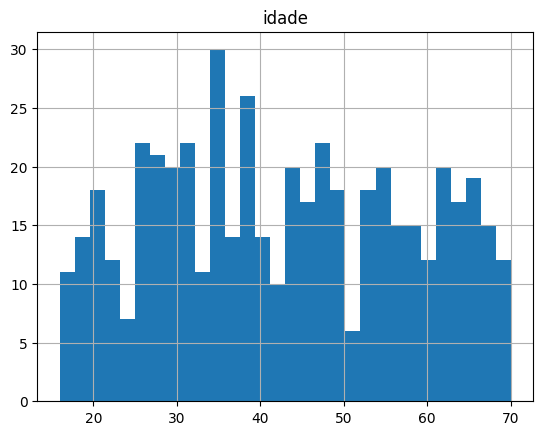

In [10]:
base_completa.hist('idade', bins=30)

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method in K-means Clustering

def calcular_wcss(dados):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init=10, random_state=0)
    kmeans.fit(X=dados)
    wcss.append(kmeans.inertia_)
  return wcss

In [12]:
dados_calc = base_completa[['peso', 'colesterol']]
dados_calc.head()

,peso,colesterol
0,102.0,111
1,149.0,183
2,113.0,129
3,134.0,162
4,133.0,155


In [13]:
wcss_clientes = calcular_wcss(dados_calc)
# visualizando dados
for i in range(len(wcss_clientes)):
  print(f"for cluster {i}, value of {wcss_clientes[i]}")


for cluster 0, value of 1248240.6686746988
for cluster 1, value of 298948.2448183639
for cluster 2, value of 127838.91656630886
for cluster 3, value of 73826.33539515288
for cluster 4, value of 49003.063874672676
for cluster 5, value of 34060.237959341765
for cluster 6, value of 25083.602386011888
for cluster 7, value of 20373.05335569742
for cluster 8, value of 15959.273964232074
for cluster 9, value of 13388.314509283886


In [14]:
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objects as go # concatenização de graficos

In [15]:
grafico_wcss = px.line( x= range(10),
                       y=wcss_clientes
                       )
grafico_wcss.show()

In [16]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_calc)
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

/home/wedivv/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[182.25316456, 217.0443038 ],
       [110.35057471, 125.77011494],
       [141.86746988, 173.03012048]])

In [17]:
def plotar_grafico(X, Y, xlabel, ylabel):
    grafico = px.scatter( x = X,
                         y = Y,
                         color= base_completa['cluster'])
    
    grafico.add_scatter(x=centroides_cluster[:,0], y=centroides_cluster[:,1], mode="markers",
            marker=dict(size=17, color="LightSeaGreen"))
    
    fig = go.Figure(grafico)
    fig.update_layout(title='Analise de Clusters',
                    xaxis_title=xlabel,
                    yaxis_title=ylabel)
    fig.show()



In [18]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [19]:
cluster_clientes = base_completa

In [20]:
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Risco Moderado'

In [21]:
# definindo
alto_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Alto Risco"]
moderado_alto = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Alto Risco")]
moderado_baixo = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Baixo Risco")]
baixo_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Baixo Risco"]


In [22]:
baixo_risco[["peso","colesterol"]].mean()


peso          110.350575
colesterol    125.770115
dtype: float64

In [23]:
moderado_alto["idade"].mean()

42.574074074074076

In [24]:
baixo_risco["colesterol"].describe()

count    174.000000
mean     125.770115
std       13.882830
min      102.000000
25%      113.250000
50%      127.000000
75%      138.000000
max      151.000000
Name: colesterol, dtype: float64

In [25]:
alto_risco["peso"].describe()

count    158.000000
mean     182.253165
std       11.189700
min      158.000000
25%      173.000000
50%      182.000000
75%      190.750000
max      203.000000
Name: peso, dtype: float64

In [26]:
moderado_baixo

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,nome_cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,1,Baixo Risco
1,54,149.0,183,Masculino,23,Roraima,RR,Brasil,48,2,Risco Moderado
2,61,113.0,129,Feminino,23,Roraima,RR,Brasil,70,1,Baixo Risco
3,154,134.0,162,Feminino,23,Roraima,RR,Brasil,26,2,Risco Moderado
4,164,133.0,155,Feminino,23,Roraima,RR,Brasil,51,2,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...,...
493,456,134.0,168,Masculino,12,Mato Grosso do Sul,MS,Brasil,29,2,Risco Moderado
494,464,144.0,171,Feminino,12,Mato Grosso do Sul,MS,Brasil,32,2,Risco Moderado
495,492,142.0,172,Masculino,12,Mato Grosso do Sul,MS,Brasil,64,2,Risco Moderado
496,493,153.0,192,Masculino,12,Mato Grosso do Sul,MS,Brasil,70,2,Risco Moderado


In [27]:
moderado_baixo.groupby('estado').size().sort_values()


estado
Mato Grosso             8
São Paulo               8
Acre                   10
Rio Grande do Sul      11
Pernambuco             11
Pará                   11
Paraíba                11
Alagoas                12
Distrito Federal       12
Espírito Santo         12
Paraná                 12
Amapá                  13
Sergipe                13
Rôndonia               14
Roraima                14
Tocantins              14
Bahia                  14
Maranhão               15
Rio de Janeiro         16
Rio Grande do Norte    17
Ceará                  17
Amazonas               17
Mato Grosso do Sul     18
Minas Gerais           19
Goiás                  21
dtype: int64

In [28]:
alto_risco["peso"].mean()

182.25316455696202